# Initial Value Problems-for-ODE

## 09.01 Ordinary Differential Equations

Suppose that the state of a system is described by a vector-valued function $y : \mathbb{R} \rightarrow \mathbb{R}^n$ where the scalar domain of the function is typically something like time, $t$.

A **differential equation** describes the relationship between some function $y(t)$ and one or more of its derivatives with respect to $t$.
$$
y'(t) = \frac{dy}{dt}
$$

* The solution to a differential equation is the function $y(t)$ that satisfies the relationship.
* For an ordinary differential equation aka ODE all of the derivatives are with respect to a **single** independent variable.
* For a partial differential equation aka PDE the derivatives are with respect to **multiple** independent variables.
* The highest order derivative appearing in the ODE determines the **order**.

#### Example: Newton's Second Law of Motion
The differential equation $F = ma$ relates the position of an object in space to the second derivative.  

In one dimension where the position is described by $y(t)$ the second-order ODE is:
$$
F \left( t, y(t), \frac{dy}{dt} \right) = m \frac{d''y}{dt^2}
$$

The solution to this differential equation is:
$$
y(t) = - \frac{1}{2}gt^2 + c_1t + c_2
$$
where
* $c_1$ is a constant the describes the initial velocity
* $c_2$ is a constant the describes the initial position

#### Higher Order ODE
An ODE with higher order derivatives can be transformed into equivalent first-order system.

For kth order ODE:
$$
y^{(k)}(t) = f \left( t, y, y', \cdots, y^{(k-1)} \right)
$$

Define $k$ new unknown functions $u_k$:
$$
u_1(t) = y(t) \\
u_2(t) = y'(t) \\
\cdots \\
u_k(t) = y^{(k-1)}(t)
$$

Take the derivatives of the unknown functions to form the system of first-order equations:
$$
u'(t) =
\begin{bmatrix}
u_1'(t) \\
u_2'(t) \\
\vdots \\
u_k'(t)
\end{bmatrix} =
\begin{bmatrix}
u_2(t) \\
u_3(t) \\
\vdots \\
f(t, u_1, \cdots, u_k)
\end{bmatrix} =
g(t, u)
$$

#### Example: Newton's Second Law of Motion
The second-order ODE described previously can be rewritten as a system of first-order equations.

Define 2 new unknown functions $u_1$ and $u_2$:
$$
u_1(t) = y(t) \\
u_2(t) = y'(t)
$$

Take the derivatives of the unknown functions to form the system:
$$
\begin{bmatrix}
u_1' \\
u_2'
\end{bmatrix} =
\begin{bmatrix}
u_2 \\
F/m
\end{bmatrix}
$$


#### Initial Value Problems
The ODE $y' = f(t, y)$ does not determine a unique solution.

The initial value $y(t_0) = y_0$ provided with the problem determines a unique solution to the ODE.

## 09.02 Stability of ODE Solutions

Stable
  * Solutions resulting from perturbations of initial value remain close to original solution.

Asymptotically stable
  * Solutions resulting from perturbations of initial value converge back to original solution.

Unstable
  * Solutions resulting from perturbations of initial value diverge away from original solution without bound.

#### Example: Scalar Test ODE
Given ODE
$$
y' = \lambda y
$$

Initial conditions: $y(0) = y_0$

Solution
$$
y = y_0 e^{\lambda t}
$$

For real $\lambda$:
* $\lambda < 0$ asymptotically stable
* $\lambda > 0$ unstable

For complex $\lambda$:
* Same as above with real component $\text{Re}(\lambda)$
* $\text{Re}(\lambda) = 0$ stable, but not asymptotically stable

#### Example: Linear System ODE
Given ODE
$$
y' = Ay
$$
where
* $A$ is a $n \times n$ diagonalizable matrix (eg $n$ linearly independent eigenvectors $v$)

Initial conditions: $y(0) = y_0$ where $y_0 = \sum_{i=1}^n \alpha_i v_i$

Solution
$$
y(t) = \sum_{i=1}^n \alpha_i v_i e^{\lambda_i t}
$$
where
* $\alpha$ is taken from the linear combination of eigenvectors which forms $y_0$

Eigenvalues $\lambda$:
* $\lambda_i < 0$ asymptotically stable
* $\lambda_i > 0$ unstable
* $\lambda_i = 0$ oscillatory solution components

Plot a demonstration of a stable ODE, $y'(t) = 0.5$ and $y(t) = y_0 + 0.5t$.

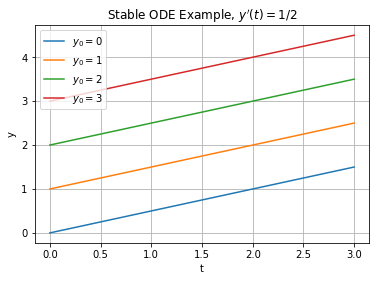

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

tmin, tmax, tnum = 0., 3., 100
t = np.linspace(tmin, tmax, tnum)

y0s = np.array([0., 1., 2., 3.])
labels = ['$y_0=0$', '$y_0=1$', '$y_0=2$', '$y_0=3$']

for y0, label in zip(y0s, labels):
    vft = np.vectorize(lambda t: 0.5*t + y0)
    plt.plot(t, vft(t), label=label)
plt.title('Stable ODE Example, $y\'(t) = 1/2$')
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

Plot a demonstration of a asymptotically stable ODE, $y'(t) = -y$ and $y(t) = y_0 e^{-t}$.

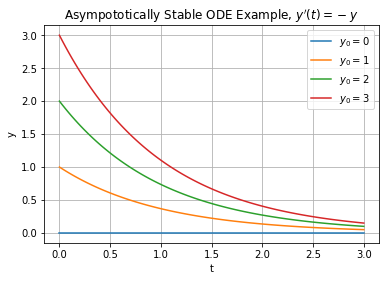

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

tmin, tmax, tnum = 0., 3., 100
t = np.linspace(tmin, tmax, tnum)

y0s = np.array([0., 1., 2., 3.])
labels = ['$y_0=0$', '$y_0=1$', '$y_0=2$', '$y_0=3$']

for y0, label in zip(y0s, labels):
    vft = np.vectorize(lambda t: y0*np.exp(-1.*t))
    plt.plot(t, vft(t), label=label)
plt.title('Asympototically Stable ODE Example, $y\'(t) = -y$')
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

Plot a demonstration of a unstable ODE, $y'(t) = y$ and $y(t) = y_0 e^t$.

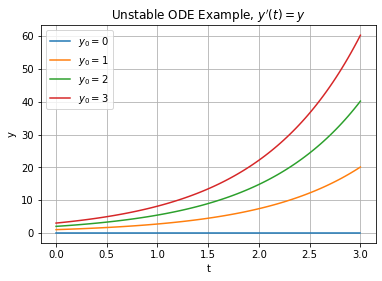

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

tmin, tmax, tnum = 0., 3., 100
t = np.linspace(tmin, tmax, tnum)

y0s = np.array([0., 1., 2., 3.])
labels = ['$y_0=0$', '$y_0=1$', '$y_0=2$', '$y_0=3$']

for y0, label in zip(y0s, labels):
    vft = np.vectorize(lambda t: y0*np.exp(t))
    plt.plot(t, vft(t), label=label)
plt.title('Unstable ODE Example, $y\'(t) = y$')
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

## 09.03 Euler's Method

#### Analytical vs. Numerical Solution
* Analytical solution of ODE is closed-form formula evaluated at any point $t$.
* Numerical solution of ODE is table of approximate values of solution at discrete set of points.

Given $t_0$ and $y_0$.
1. Set $k=0$.
2. Evaluate $f(t_k, y_k)$ to obtain the slope of trajectory.
3. Predict value $y_{k+1}$ at $t_{k+1}$ for a given time-step $h_k$ eg $t_{k+1} = t_k + h_k$
4. Set $k=k+1$ and repeat from step 2.

The step $y_k$ to $y_{k+1}$ adds some error to solution.
* As a result, the solution at $y_{k+1}$ is on a different trajectory than the previous solution at $y_k$.
* Stability of solutions determines whether the errors grow or diminish with increasing time step.

Euler's method is a single-step method which advances solution by **extrapolating** along straight line of slope $f(t_k, y_k)$.
$$
y_{k+1} = y_k + h_k f(t_k, y_k)
$$

#### Errors
Numerical methods for ODE incur 2 types of error:
1. *Rounding error* due to finite precision floating-point
2. *Truncation error* aka discretization error due to approximation method

**Truncation error** is dominant factor in determining accuracy and composed of:
1. *Global error* difference between computed solution and true solution passing through initial point
$$
e_k = y_k - y(t_k)
$$
2. *Local error* difference between computed solution and true solution passing through previous point
$$
l_k = y_k - u_{k-1}(t_k)
$$

Global error will be **greater** than sum of local errors when solution is unstable and **less than** sum of local errors when solution is stable.

## 09.04 Accuracy and Stability

## 09.05 Implicit Methods

## 09.06 Stiffness

## 09.07 Single-Step Methods

## 09.08 Multistep Methods

## 09.09 Multivalue Methods